a) Escreva um programa em Python que calcule a seguinte expressão, variando o valor de x em torno de zero (por exemplo, de 10^−1 até 10^−15): f(x) = (1 - cos(x))/x^2.

Compare os valores obtidos com o valor limite teórico da função conforme x→0, que é:

lim x->0  (1 - cos(x))/x^2 = 1/2

Utilize gráficos em Python para visualizar o comportamento da função à medida que x se aproxima de 0. O que você observa para valores muito pequenos de x? Como o cancelamento numérico afeta o resultado?

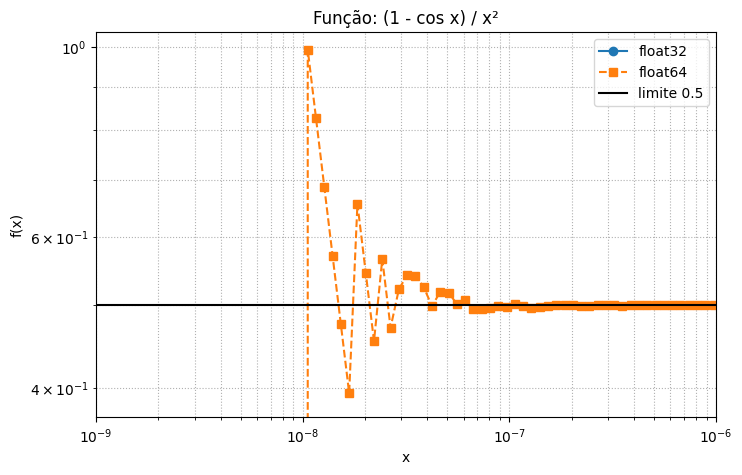

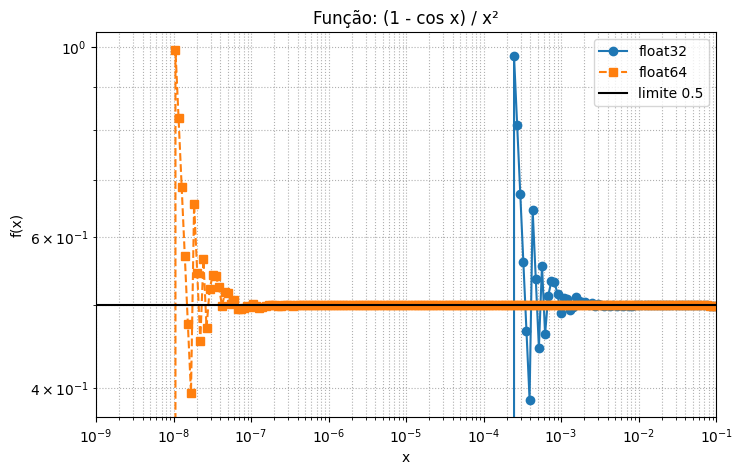

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def funcao(x, dtype=np.float64):
    """
    f(x)= (1 - cos(x)) / x^2
    """
    x = np.array(x, dtype=dtype)
    return (1 - np.cos(x)) / (x ** 2)

# escala logarítmica de x
lista_de_x = np.logspace(-20, 0, num=500)

# float32 e float64, para cada fórmula
funcao_float32 = funcao(lista_de_x, dtype=np.float32)
funcao_float64 = funcao(lista_de_x, dtype=np.float64)

# valor teórico do limite
theoretical = 0.5

# === Plot de f(x) ===
plt.figure(figsize=(8,5))
plt.loglog(lista_de_x, funcao_float32, 'o-', label='float32')
plt.loglog(lista_de_x, funcao_float64, 's--', label='float64')
plt.axhline(theoretical, color='k', label='limite 0.5')
plt.xlim(1e-9, 1e-6)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Função: (1 - cos x) / x²')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.show()

plt.figure(figsize=(8,5))
plt.loglog(lista_de_x, funcao_float32, 'o-', label='float32')
plt.loglog(lista_de_x, funcao_float64, 's--', label='float64')
plt.axhline(theoretical, color='k', label='limite 0.5')
plt.xlim(1e-9, 1e-1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Função: (1 - cos x) / x²')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.show()

**Resposta**: Para 𝑥 muito pequenos, os valores calculados de `(1 - cos(x)) / x^2` deixam de ficar próximos de 0.5 e exibem picos e vales aleatórios. Isso é causado pelo cancelamento numérico: na subtração `(1 - cos(x))`, perde-se dígitos significativos quando `cos(𝑥) ≈ 1`, e a operação deixa de ser precisa. Em `float32` o efeito aparece bem antes (por volta de 10^−4), enquanto em `float64` ocorre mais abaixo (por volta de 10^−8). 

-----
b) Reescreva a função anterior em Python utilizando a identidade trigonométrica: `1 - cos(x) = 2sin^2(x/2)` e recalcule a função `f(x) =2sin^2(x/2)/x^2`.

Compare os resultados obtidos com os da letra anterior utilizando o mesmo gráfico. Há melhora na precisão numérica? Explique por que isso acontece em seu código ou relatório.

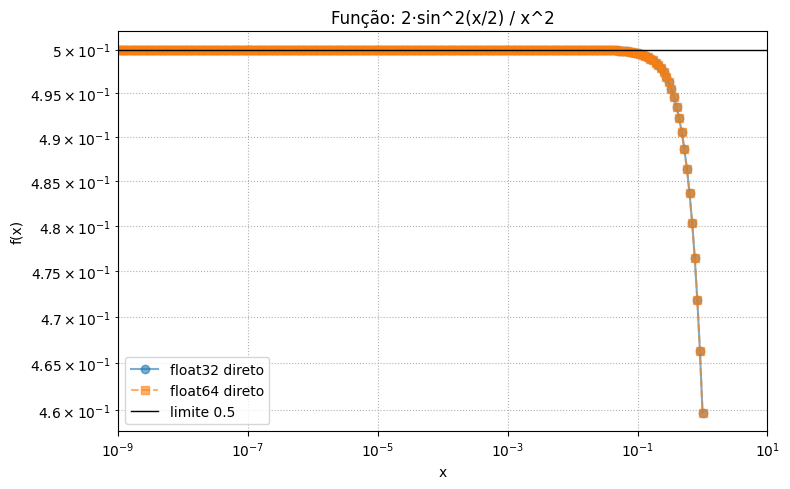

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def funcao2(x, dtype=np.float64):
    """
    f(x) = 2·sin^2(x/2) / x^2
    equivalente a (1 - cos x) / x^2, mas sem subtrair valores quase iguais

    """
    x = np.array(x, dtype=dtype)
    return 2 * np.sin(x/2)**2 / (x**2)

# escala logarítmica de x
lista_de_x = np.logspace(-20, 0, num=500)

# float32 e float64, para cada fórmula
funcao_float32 = funcao2(lista_de_x, dtype=np.float32)
funcao_float64 = funcao2(lista_de_x, dtype=np.float64)

# valor teórico do limite
theoretical = 0.5

# === Plot de f(x) ===
plt.figure(figsize=(8,5))
plt.loglog(lista_de_x, funcao_float32, 'o-',  alpha=0.6, label='float32 direto')
plt.loglog(lista_de_x, funcao_float64, 's--', alpha=0.6, label='float64 direto')
plt.axhline(theoretical, color='k', linewidth=1, label='limite 0.5')
plt.xscale('log')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Função: 2·sin^2(x/2) / x^2')
plt.xlim(1e-9, 10)
plt.legend(loc='best')
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()

**Resposta**: Sim, o gráfico com a função `f(x) = 2sin^2(x/2)/x^2`  fica muito mais fiel a 0,5 para valores de 𝑥 menores do que o com a função  `f(x) = (1 - cos(x)) / x^2`. Isso ocorre pois a expressão `f(x) = (1 - cos(x)) / x^2` faz a subtração de dois números muito próximos de 1 (quando 𝑥 → 0), e aí perdemos dígitos significativos, o chamado cancelamento numérico. Já na expressão `f(x) = 2sin^2(x/2)/x^2` não faz subtração de valores quase iguais. Em vez disso, calcula-se `sin(x/2)`, que para  𝑥 → 0 é bem comportado, e só depois se divide por 𝑥^2. Assim, a mantissa de ponto flutuante retém muito mais precisão e o resultado fica corretamente próximo de 0,5 mesmo para 𝑥 extremamente pequeno.

----
c)Inclua em seu script Python um comentário explicando com suas palavras o que é cancelamento catastrófico em ponto flutuante. Dê também um exemplo adicional (em Python) onde isso pode ocorrer, além do exemplo envolvendo cosseno.

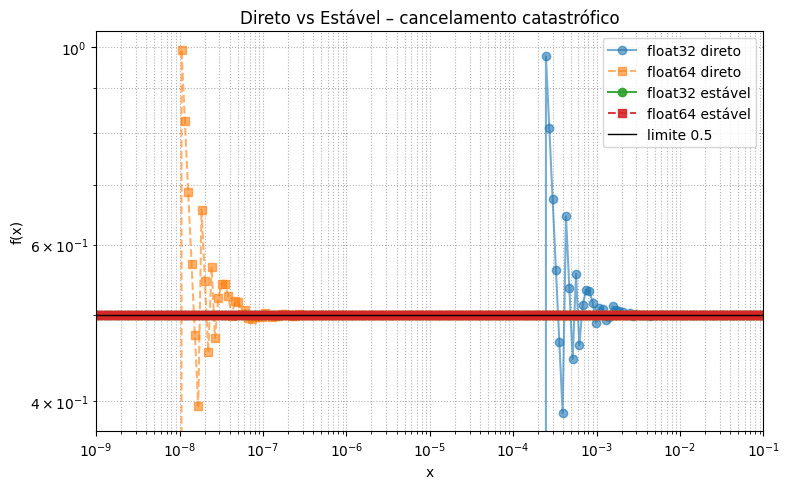

Exemplo de cancelamento com sqrt:
  Direto:       4.9999999696126451e-09
  Racionalizado:4.9999999874999999e-09


In [ ]:
# -*- coding: utf-8 -*-
"""
Cancelamento catastrófico em ponto flutuante:
Em ponto flutuante, números são armazenados com um número limitado de dígitos 
na mantissa. Quando você subtrai dois valores muito próximos, a maior parte dos 
dígitos coincide e "se cancela", restando apenas poucos dígitos significativos 
no resultado. Isso provoca grande erro relativo na operação — é o chamado 
*cancelamento catastrófico*.

No nosso caso, ao fazer (1 - cos(x)) para x muito pequeno, cos(x) ≈ 1 e perdemos
todos os dígitos iguais a 1, sobrando apenas erros da aproximação de cos(x).
"""

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def funcao(x, dtype=np.float64):
    """
    Cálculo direto: (1 - cos(x)) / x^2
    Sofre cancelamento catastrófico quando x → 0.
    """
    x = np.array(x, dtype=dtype)
    return (1 - np.cos(x)) / (x ** 2)

def funcao_estavel(x, dtype=np.float64):
    """
    Fórmula numericamente estável:
    2 * sin²(x/2) / x²
    evita a subtração de valores quase iguais.
    """
    x = np.array(x, dtype=dtype)
    return 2 * np.sin(x/2)**2 / (x**2)

# escala logarítmica de x
lista_de_x = np.logspace(-20, 0, num=500)
theoretical = 0.5

f32 = funcao(lista_de_x, dtype=np.float32)
f64 = funcao(lista_de_x, dtype=np.float64)
e32 = funcao_estavel(lista_de_x, dtype=np.float32)
e64 = funcao_estavel(lista_de_x, dtype=np.float64)

# plot comparativo
plt.figure(figsize=(8,5))
plt.loglog(lista_de_x, f32, 'o-',  alpha=0.6, label='float32 direto')
plt.loglog(lista_de_x, f64, 's--', alpha=0.6, label='float64 direto')
plt.loglog(lista_de_x, e32, 'o-',  alpha=0.9, label='float32 estável')
plt.loglog(lista_de_x, e64, 's--', alpha=0.9, label='float64 estável')
plt.axhline(theoretical, color='k', linewidth=1, label='limite 0.5')
plt.xscale('log')
plt.xlim(1e-9, 1e-1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Direto vs Estável – cancelamento catastrófico')
plt.legend(loc='best')
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()


# === Exemplo adicional de cancelamento catastrófico ===
eps = np.float64(1e-8)

# método direto (sofre cancelamento)
d1 = np.sqrt(1 + eps) - 1

# método estável (racionalização da diferença de quadrados)
d2 = eps / (np.sqrt(1 + eps) + 1)

print(f"Exemplo de cancelamento com sqrt:\n"
      f"  Direto:       {d1:.16e}\n"
      f"  Racionalizado:{d2:.16e}")

----
d) (Exploração adicional: Precisão simples vs. dupla)

- Refaça os cálculos das expressões das letras (a) e (b) utilizando explicitamente os tipos `numpy.float32` e `numpy.float64`.
- Plote os erros relativos entre os valores numéricos e o valor teórico 1/2
- Qual tipo de precisão apresenta melhor estabilidade numérica?
- Comente as implicações do uso de cada tipo de precisão em aplicações reais.

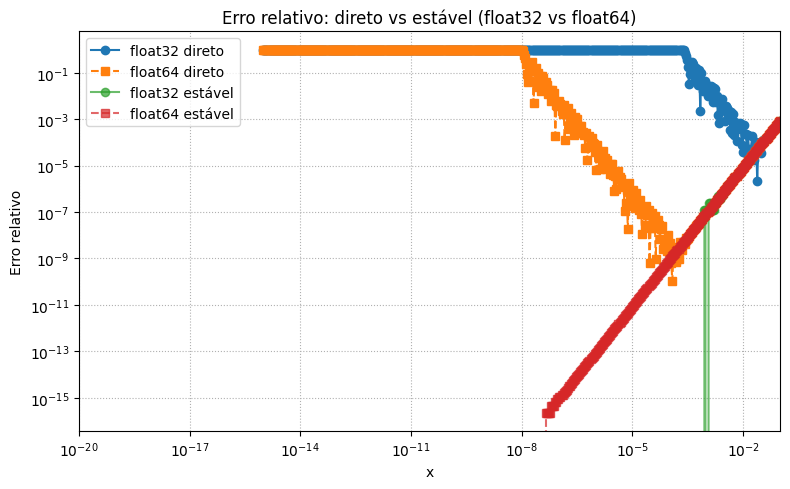

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# --- Definição das duas fórmulas ---
def f_direct(x, dtype):
    """
    Versão direta: (1 - cos(x)) / x^2
    """
    x = np.array(x, dtype=dtype)
    return (1 - np.cos(x)) / (x**2)

def f_stable(x, dtype):
    """
    Versão estável: 2 * (sin(x/2)/x)^2
    equivalente à direta, mas evita cancelamento.
    """
    x = np.array(x, dtype=dtype)
    return 2 * (np.sin(x/2) / x)**2

# --- Pontos de x e valor teórico ---
xs = np.logspace(-1, -15, num=500)  # de 10⁻¹ a 10⁻¹⁵
theoretical = 0.5

# --- Cálculo em precisão simples (float32) e dupla (float64) ---
f32_dir    = f_direct(xs,  np.float32)
f64_dir    = f_direct(xs,  np.float64)
f32_stable = f_stable(xs,  np.float32)
f64_stable = f_stable(xs,  np.float64)

# --- Erro relativo = |valor_numérico – valor_teórico| / valor_teórico ---
err32_dir    = np.abs(f32_dir    - theoretical) / theoretical
err64_dir    = np.abs(f64_dir    - theoretical) / theoretical
err32_stable = np.abs(f32_stable - theoretical) / theoretical
err64_stable = np.abs(f64_stable - theoretical) / theoretical

# --- Plotagem dos erros relativos ---
plt.figure(figsize=(8,5))
plt.loglog(xs, err32_dir,    'o-',  label='float32 direto')
plt.loglog(xs, err64_dir,    's--', label='float64 direto')
plt.loglog(xs, err32_stable, 'o-',  alpha=0.7, label='float32 estável')
plt.loglog(xs, err64_stable, 's--', alpha=0.7, label='float64 estável')
plt.xlabel('x')
plt.ylabel('Erro relativo')
plt.title('Erro relativo: direto vs estável (float32 vs float64)')
plt.xlim(1e-20, 1e-1)
plt.legend(loc='best')
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()


**Resposta**:  A análise do gráfico mostra que, para ambos os modos de cálculo, a precisão dupla (`float64`) mantém o erro relativo sistematicamente menor do que a precisão simples (`float32`), mas a grande diferença de estabilidade vem da fórmula utilizada: a versão “estável” 
`2*(sin(x/2)/x)^2` apresenta erros muitas ordens de magnitude menores que a versão direta `1−cos(x) / x^2`​ , especialmente à medida que 𝑥 se aproxima de valores muito pequenos, onde ocorre cancelamento catastrófico. Portanto, a combinação mais estável é a precisão dupla aplicada à fórmula estável.

Em aplicações reais, essa escolha tem implicações diretas sobre desempenho, consumo de memória e confiabilidade dos resultados. Usar `float32` pode ser vantajoso em sistemas embarcados, processamento em GPU ou algoritmos que exigem alto throughput e toleram alguma imprecisão, mas ele sofre com limites de bits quando a expressão envolve subtrações quase completas. Já `float64` oferece maior fidelidade numérica e é normalmente a escolha em simulações científicas, cálculos financeiros ou engenharia, onde o impacto de erros acumulados pode ser inaceitável. Independentemente da precisão, adotar formulações numericamente estáveis é um princípio fundamental para evitar erros de arredondamento excessivos e garantir resultados consistentes em todo o domínio de interesse.